# 3. Exploratory Data Analysis

In this notebook, we explore basic metrics of the collected routes and areas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import pickle
import warnings

import requests
from bs4 import BeautifulSoup
import functools
import operator
import os
from MPAreaTree import MPAreaTree
pd.set_option('display.max_colwidth', 4000)
warnings.filterwarnings('ignore')

In [2]:
routes = pd.read_csv('./data/routes.csv')
areas = pd.read_csv('./data/areas.csv')
ratings = pd.read_csv('./data/ratings.csv')
area_tree = pickle.load(open('./pickle/area_tree.pkl', 'rb'))

In [3]:
# average score/route
routes['score'].mean()

2.383954171987567

In [4]:
# average number of votes/route
routes['votes'].mean()

13.17930029154519

In [5]:
# average rating / vote
ratings['user_rating'].mean()

2.7212617496989218

In [6]:
# average routes rated / user
ratings.groupby('user_id')['route_id'].count().mean()

36.84080253151974

In [7]:
ratings.groupby('user_id')['route_id'].count().describe()

count    60359.000000
mean        36.840803
std        118.345071
min          1.000000
25%          2.000000
50%          5.000000
75%         22.000000
max       4703.000000
Name: route_id, dtype: float64

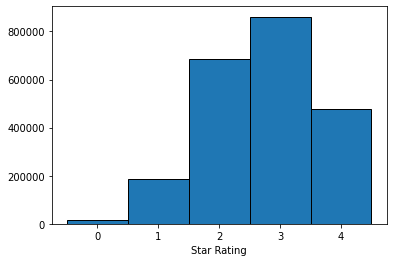

In [14]:
# Histogram of the rating distributions
ratings['user_rating'].hist(bins = np.arange(6)-.5, grid=False,edgecolor = 'black', density = False)
plt.xlabel('Star Rating');

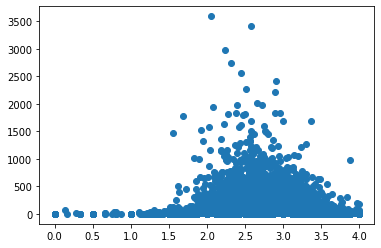

In [18]:
plt.scatter( y = ratings.groupby('user_id').count()['user_rating'], x = ratings.groupby('user_id')['user_rating'].mean())

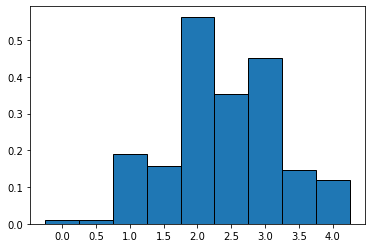

In [37]:
routes['score'].hist(bins = np.arange(0,5,.5)-.25, edgecolor = 'black', grid = False, density = 1)
plt.xticks(np.arange(0,4.5,.5));

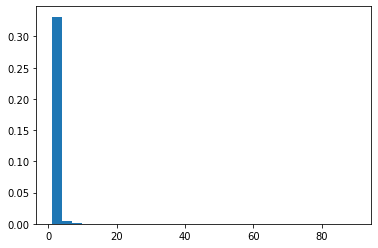

In [42]:
# number of pitches of each route
routes['pitches'].hist(bins = 30, grid = False, density = True)

In [43]:
routes['pitches'].value_counts().sort_values('index', ascending = False)

1     155716
2       5398
3       2238
4       1116
5        616
6        346
7        181
8        133
10        73
9         66
12        35
11        24
13        15
14        14
15         7
18         7
17         6
19         4
20         3
16         2
21         2
23         2
25         2
30         2
29         1
44         1
22         1
90         1
Name: pitches, dtype: int64

In [44]:
routes.describe()

,route_id,area_id,pitches,score,votes,grade_numeric,Unnamed: 0
count,1.660120e+05,1.660120e+05,166012.000000,166012.000000,166012.000000,166012.000000,51231.000000
mean,1.107607e+08,1.094098e+08,1.135219,2.383954,13.179300,20.084024,12111.554293
std,4.667773e+06,4.358136e+06,0.766569,0.810050,38.472284,12.059338,7384.375816
min,1.057147e+08,1.057143e+08,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.066480e+08,1.059820e+08,1.000000,2.000000,1.000000,10.000000,5591.500000
50%,1.088637e+08,1.072862e+08,1.000000,2.300000,3.000000,18.000000,12117.000000
75%,1.142265e+08,1.120275e+08,1.000000,3.000000,9.000000,28.000000,18615.500000
max,1.200644e+08,1.200624e+08,90.000000,4.000000,1842.000000,76.000000,25760.000000
